In [1]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(256, 256),
    batch_size = 32
)

Found 2152 files belonging to 3 classes.


In [3]:
class_name = dataset.class_names

In [4]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 1 1 1 2 0 1 0 0 0 2 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1]


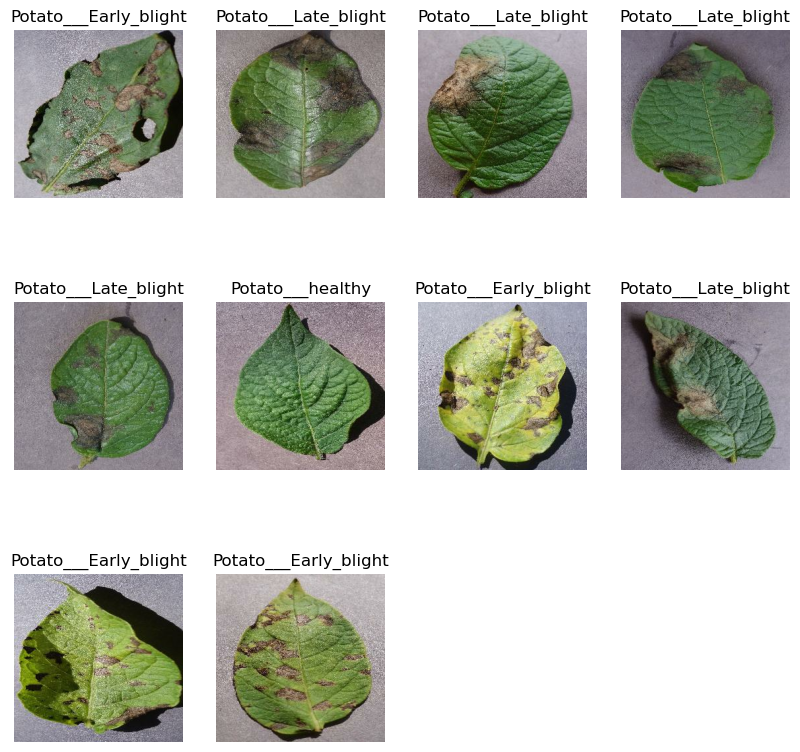

In [8]:
plt.figure(figsize=(10 , 10))
for image_batch , label_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3 , 4 , i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [9]:
len(dataset)

68

In [10]:
# 80% ==> training
# 20% ==> 10% valiidation , 10% testing

In [11]:
train_size = 0.8
len(dataset)* train_size

54.400000000000006

In [12]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [13]:
len(dataset)

68

In [14]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [15]:
validation_size = 0.1
len(dataset) * validation_size

6.800000000000001

In [16]:
val_dataset = test_ds.take(6)
len(val_dataset)

6

In [17]:
test_dataset = test_ds.skip(6)
len(test_dataset)

8

In [18]:
def get_dataset_partitions_tf(dataset , train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle = True , shuffle_size = 1000):
    ds_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size , seed = 42)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = dataset.take(train_size)

    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds , test_ds


In [19]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds) , len(val_ds) , len(test_ds)

(54, 6, 8)

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256 ,256 ),
    layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("HORIZONTAL_AND_VERTICAL"),
    layers.RandomRotation(0.2)
])

In [24]:

IMAGE_SIZE = 256
CHANNELS = 3

input_shape = ( IMAGE_SIZE , IMAGE_SIZE , CHANNELS)

model = models.Sequential([

    layers.Input(shape=input_shape),
    
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255),

    layers.RandomFlip("HORIZONTAL_AND_VERTICAL"),
    layers.RandomRotation(0.2),
    
    layers.Conv2D(32 , (3 , 3) , activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    
    layers.Conv2D(64 , (3 , 3) , activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64 , (3 , 3) , activation='relu' ),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64 , (3 , 3) , activation='relu'),
    layers.MaxPooling2D((2 , 2)),
    layers.Conv2D(64 , (3 , 3) , activation='relu' ),
    layers.MaxPooling2D((2 , 2)),

    layers.Flatten(),
    layers.Dense(64 , activation='relu'),
    layers.Dense(3 , activation='softmax'),
    
])

model.build(input_shape =(None , IMAGE_SIZE , IMAGE_SIZE , CHANNELS) )

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)         │ (None, 256, 256, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ rescaling_1 (Rescaling)       │ (None, 256, 256, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ random_flip_1 (RandomFlip)    │ (None, 256, 256, 3)   │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ random_rotation_1             │ (None, 256, 256, 3)   │            0 │
│ (RandomRotation)              │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d (Conv2D)               │ (None, 254, 254, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 127, 127, 32)  │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 125, 125, 64)  │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 62, 62, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 60, 60, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 28, 28, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_3               │ (None, 14, 14, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 12, 12, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_4               │ (None, 6, 6, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 2304)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 64)            │      147,520 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 3)             │          195 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 277,891 (1.06 MB)

 Trainable params: 277,891 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds, 
    epochs=50,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 763ms/step - accuracy: 0.6045 - loss: 0.7929 - val_accuracy: 0.7188 - val_loss: 0.6551
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 712ms/step - accuracy: 0.8550 - loss: 0.3693 - val_accuracy: 0.8698 - val_loss: 0.3329
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 692ms/step - accuracy: 0.9261 - loss: 0.2002 - val_accuracy: 0.7917 - val_loss: 0.7438
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 696ms/step - accuracy: 0.9155 - loss: 0.2053 - val_accuracy: 0.8958 - val_loss: 0.2652
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 676ms/step - accuracy: 0.9249 - loss: 0.1835 - val_accuracy: 0.8958 - val_loss: 0.2249
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 684ms/step - accuracy: 0.9460 - loss: 0.1426 - val_accuracy: 0.9219 - val_loss: 0.2396
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 678ms/step - accuracy: 0.9372 - loss: 0.1750 - val_accuracy: 0.9531 - val_loss: 0.1293
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 717ms/step - accuracy: 0.9554 - loss: 0.1377 - val_accu

In [28]:
scores = model.evaluate(test_ds) #0.9882

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - accuracy: 0.9922 - loss: 0.0447  


In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

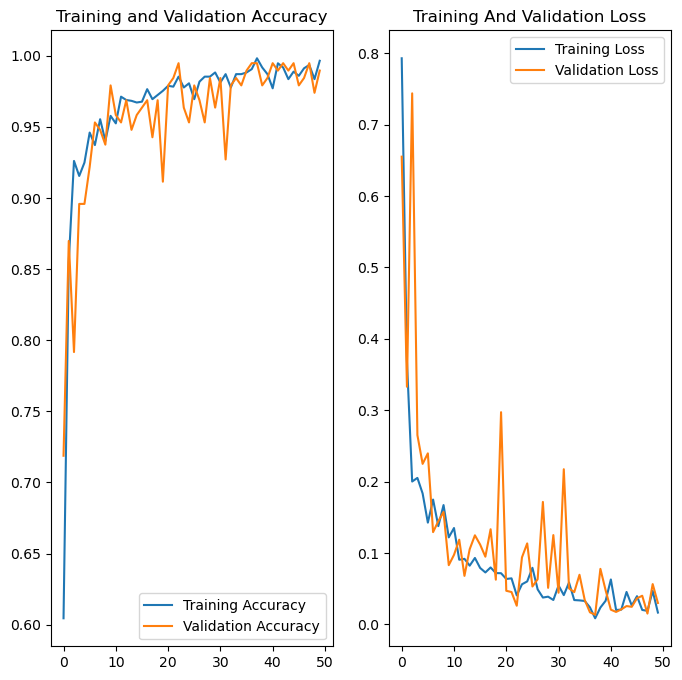

In [35]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50) , acc , label='Training Accuracy')
plt.plot(range(50) , val_acc , label='Validation Accuracy')
plt.legend(loc= 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1 , 2, 2)
plt.plot(range(50), loss, label = 'Training Loss')
plt.plot(range(50) , val_loss , label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual Label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Predicted label : Potato___Late_blight


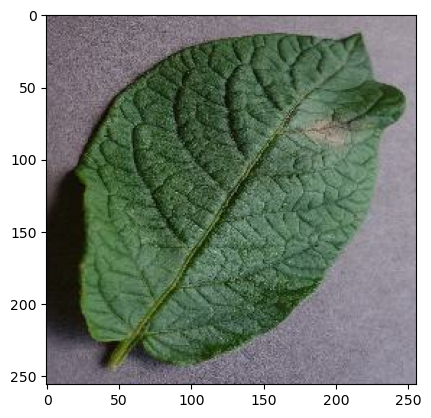

In [37]:
import numpy as np
for image_batch , label_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label: " , class_name[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted label :" , class_name[np.argmax(batch_prediction[0])])

In [43]:
class_name[np.argmax(batch_prediction[0])]

'Potato___Late_blight'

In [44]:
# Write a function for inference

def predict(model , img):
    image_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    image_array = tf.expand_dims(image_array , 0)

    prediction = model.predict(image_array)

    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    return predicted_class , confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


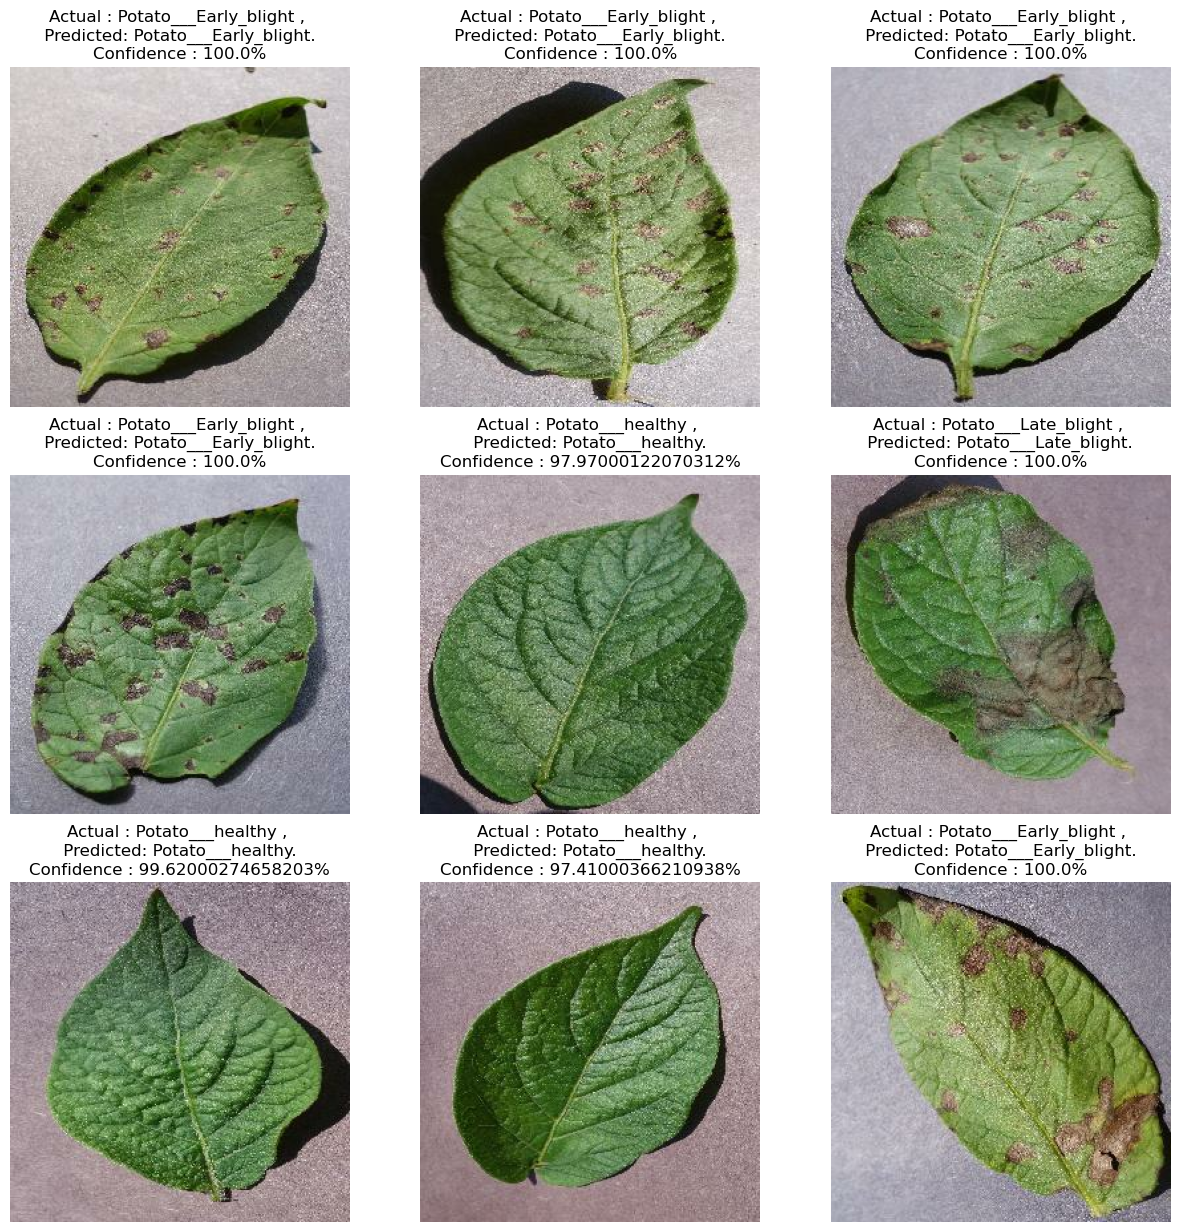

In [45]:
plt.figure(figsize = (15 , 15))
for image , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3 , 3, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))

        predicted_class , confidence = predict(model , image[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual : {actual_class} , \n Predicted: {predicted_class}. \nConfidence : {confidence}%")

        plt.axis("off")

### Saving the Model
###### We append the model to the list of models as a new version

In [49]:
import os
model_version = max([int(i) for i in os.listdir("../models") + [0]]) +1


ValueError: invalid literal for int() with base 10: 'potatoes.h5'

In [47]:
model.save(f"../models/potatoes.h5")

In [50]:
model.save("../models/potatos.h5")